In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4h/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.096701,0.000000,0.000000,0.000000,0.000000,0.000000,4.584342,0.000561,0.959007,...,0,8,0.857143,0.000000,0,,0,,0.800000,CONTRADICTION
1,0.000000,1.912939,0.000000,0.000000,0.000000,0.000000,0.000000,4.385955,0.001464,0.787925,...,0,7,0.875000,0.000000,0,,0,,0.333333,CONTRADICTION
2,0.000000,2.176234,0.000000,0.000000,0.000000,0.000000,0.000000,4.551917,0.000832,0.942610,...,0,7,1.000000,0.000000,0,,0,,0.400000,ENTAILMENT
3,1.309895,1.909126,1.399581,3.811703,0.006280,0.140442,0.072331,4.168479,0.002797,0.478862,...,3,5,0.375000,0.181220,0,,0,,0.333333,CONTRADICTION
4,1.299021,2.183393,1.441167,3.821563,0.005581,0.155224,0.066714,4.060155,0.003064,0.465865,...,3,7,0.375000,0.265583,0,,0,,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,1.352706,1.052941,0.811278,3.786475,0.006455,0.084316,0.020937,3.924434,0.003752,0.224118,...,4,3,0.166667,0.083317,0,,0,,0.200000,CONTRADICTION
4435,1.373320,1.384432,1.384432,3.779084,0.008525,0.056842,0.024570,3.779084,0.006149,0.056842,...,4,3,0.250000,0.000000,0,,1,play,0.000000,CONTRADICTION
4436,1.263298,1.687640,1.370951,3.787387,0.006522,0.202038,0.054981,3.742518,0.004020,0.195824,...,2,5,0.000000,0.210428,0,,0,,0.000000,CONTRADICTION
4437,1.298727,1.410848,1.459148,3.685267,0.004270,0.156616,0.059745,4.094972,0.002200,0.435175,...,1,6,0.333333,0.207085,0,,0,,0.333333,CONTRADICTION


<Axes: title={'center': 'list_incomp'}, xlabel='clases'>

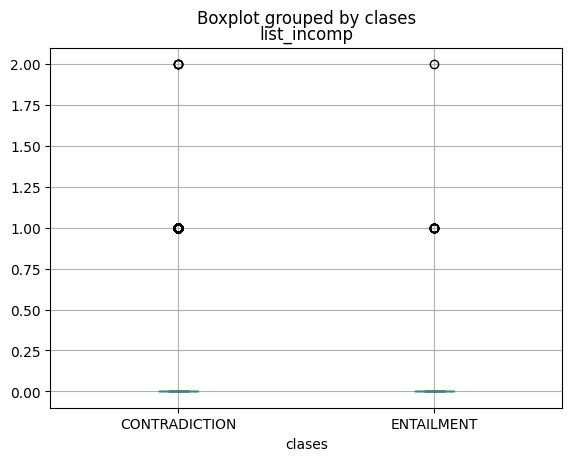

In [4]:
train.boxplot(by="clases",column="list_incomp")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,2.096701,0.000000,0.000000,0.000000,0.000000,0.000000,4.584342,0.000561,0.959007,...,0.000000,7,0,8,0.857143,0.000000,0,0,0.800000,CONTRADICTION
1,0.000000,1.912939,0.000000,0.000000,0.000000,0.000000,0.000000,4.385955,0.001464,0.787925,...,0.543564,8,0,7,0.875000,0.000000,0,0,0.333333,CONTRADICTION
2,0.000000,2.176234,0.000000,0.000000,0.000000,0.000000,0.000000,4.551917,0.000832,0.942610,...,0.000000,5,0,7,1.000000,0.000000,0,0,0.400000,ENTAILMENT
3,1.309895,1.909126,1.399581,3.811703,0.006280,0.140442,0.072331,4.168479,0.002797,0.478862,...,1.405639,8,3,5,0.375000,0.181220,0,0,0.333333,CONTRADICTION
4,1.299021,2.183393,1.441167,3.821563,0.005581,0.155224,0.066714,4.060155,0.003064,0.465865,...,1.405639,8,3,7,0.375000,0.265583,0,0,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,1.352706,1.052941,0.811278,3.786475,0.006455,0.084316,0.020937,3.924434,0.003752,0.224118,...,0.918296,6,4,3,0.166667,0.083317,0,0,0.200000,CONTRADICTION
4435,1.373320,1.384432,1.384432,3.779084,0.008525,0.056842,0.024570,3.779084,0.006149,0.056842,...,0.000000,4,4,3,0.250000,0.000000,0,1,0.000000,CONTRADICTION
4436,1.263298,1.687640,1.370951,3.787387,0.006522,0.202038,0.054981,3.742518,0.004020,0.195824,...,0.918296,6,2,5,0.000000,0.210428,0,0,0.000000,CONTRADICTION
4437,1.298727,1.410848,1.459148,3.685267,0.004270,0.156616,0.059745,4.094972,0.002200,0.435175,...,0.918296,3,1,6,0.333333,0.207085,0,0,0.333333,CONTRADICTION


In [6]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [7]:
#train=train[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]

In [8]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [9]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [10]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,-0.084946,0.834181,0.988270,0.849918,0.596092,0.525452,-0.621540,0.597992,-0.720116,...,-0.015816,0.773620,0.198022,0.754652,0.021932,-0.574617,0.683179,-0.070801,0.225640,-0.553416
entropia_total,-0.084946,1.000000,0.124438,-0.048026,-0.083371,0.175141,0.182954,0.058768,-0.070217,0.183881,...,0.037442,0.043184,0.251732,-0.109100,0.254451,0.131078,0.171235,-0.024776,-0.043282,0.050068
entropias,0.834181,0.124438,1.000000,0.877670,0.682817,0.802828,0.718797,-0.544028,0.499179,-0.583171,...,-0.016684,0.690919,0.246674,0.735994,0.126850,-0.508010,0.500830,-0.049378,0.092618,-0.495477
mutinf,0.988270,-0.048026,0.877670,1.000000,0.812225,0.698777,0.621272,-0.605496,0.572050,-0.692370,...,-0.017240,0.778547,0.197419,0.748843,0.039476,-0.566701,0.692796,-0.068853,0.208989,-0.547644
mearts,0.849918,-0.083371,0.682817,0.812225,1.000000,0.485572,0.428545,-0.606620,0.688170,-0.638789,...,-0.018221,0.668108,0.137305,0.644354,-0.027362,-0.510522,0.608076,-0.069855,0.135550,-0.489920
max_info,0.596092,0.175141,0.802828,0.698777,0.485572,1.000000,0.924994,-0.365842,0.324168,-0.309864,...,-0.013612,0.542584,0.115322,0.456450,0.100486,-0.332607,0.537741,-0.035372,0.040057,-0.330192
sumas,0.525452,0.182954,0.718797,0.621272,0.428545,0.924994,1.000000,-0.322341,0.289705,-0.259634,...,-0.013509,0.479356,0.040487,0.388777,-0.019162,-0.295896,0.529049,-0.044677,0.009790,-0.287704
mutinf_t,-0.621540,0.058768,-0.544028,-0.605496,-0.606620,-0.365842,-0.322341,1.000000,-0.917468,0.913332,...,-0.109978,-0.678469,-0.029090,-0.640856,0.105131,0.702140,-0.249587,0.071584,-0.030792,0.836804
mearts_t,0.597992,-0.070217,0.499179,0.572050,0.688170,0.324168,0.289705,-0.917468,1.000000,-0.889605,...,0.106542,0.650641,-0.005992,0.606246,-0.154524,-0.680241,0.252969,-0.081598,0.000140,-0.809497
max_info_t,-0.720116,0.183881,-0.583171,-0.692370,-0.638789,-0.309864,-0.259634,0.913332,-0.889605,1.000000,...,-0.056366,-0.697059,-0.075358,-0.745128,0.096554,0.746366,-0.251028,0.073673,-0.061371,0.825274


<Axes: >

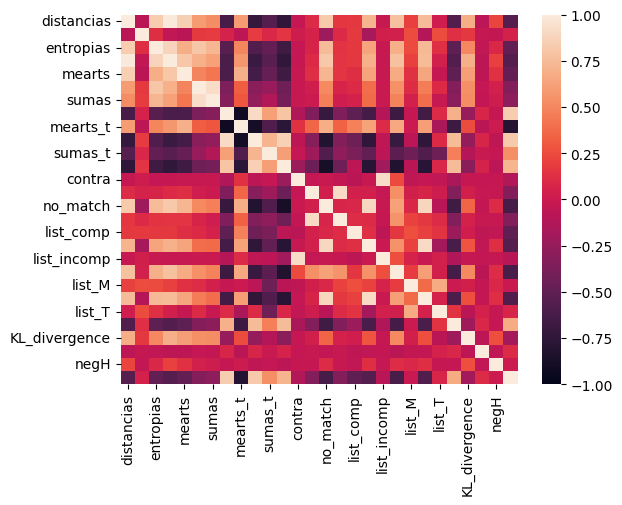

In [11]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [12]:
train_m.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [13]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,-0.084946,0.834181,0.988270,0.849918,0.596092,0.525452,-0.621540,0.597992,-0.720116,...,-0.015816,0.773620,0.198022,0.754652,0.021932,-0.574617,0.683179,-0.070801,0.225640,-0.553416
entropia_total,-0.084946,1.000000,0.124438,-0.048026,-0.083371,0.175141,0.182954,0.058768,-0.070217,0.183881,...,0.037442,0.043184,0.251732,-0.109100,0.254451,0.131078,0.171235,-0.024776,-0.043282,0.050068
entropias,0.834181,0.124438,1.000000,0.877670,0.682817,0.802828,0.718797,-0.544028,0.499179,-0.583171,...,-0.016684,0.690919,0.246674,0.735994,0.126850,-0.508010,0.500830,-0.049378,0.092618,-0.495477
mutinf,0.988270,-0.048026,0.877670,1.000000,0.812225,0.698777,0.621272,-0.605496,0.572050,-0.692370,...,-0.017240,0.778547,0.197419,0.748843,0.039476,-0.566701,0.692796,-0.068853,0.208989,-0.547644
mearts,0.849918,-0.083371,0.682817,0.812225,1.000000,0.485572,0.428545,-0.606620,0.688170,-0.638789,...,-0.018221,0.668108,0.137305,0.644354,-0.027362,-0.510522,0.608076,-0.069855,0.135550,-0.489920
max_info,0.596092,0.175141,0.802828,0.698777,0.485572,1.000000,0.924994,-0.365842,0.324168,-0.309864,...,-0.013612,0.542584,0.115322,0.456450,0.100486,-0.332607,0.537741,-0.035372,0.040057,-0.330192
sumas,0.525452,0.182954,0.718797,0.621272,0.428545,0.924994,1.000000,-0.322341,0.289705,-0.259634,...,-0.013509,0.479356,0.040487,0.388777,-0.019162,-0.295896,0.529049,-0.044677,0.009790,-0.287704
mutinf_t,-0.621540,0.058768,-0.544028,-0.605496,-0.606620,-0.365842,-0.322341,1.000000,-0.917468,0.913332,...,-0.109978,-0.678469,-0.029090,-0.640856,0.105131,0.702140,-0.249587,0.071584,-0.030792,0.836804
mearts_t,0.597992,-0.070217,0.499179,0.572050,0.688170,0.324168,0.289705,-0.917468,1.000000,-0.889605,...,0.106542,0.650641,-0.005992,0.606246,-0.154524,-0.680241,0.252969,-0.081598,0.000140,-0.809497
max_info_t,-0.720116,0.183881,-0.583171,-0.692370,-0.638789,-0.309864,-0.259634,0.913332,-0.889605,1.000000,...,-0.056366,-0.697059,-0.075358,-0.745128,0.096554,0.746366,-0.251028,0.073673,-0.061371,0.825274


In [14]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
entropia_total,-0.084946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
entropias,0.834181,0.124438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mutinf,0.988270,-0.048026,0.877670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mearts,0.849918,-0.083371,0.682817,0.812225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info,0.596092,0.175141,0.802828,0.698777,0.485572,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
sumas,0.525452,0.182954,0.718797,0.621272,0.428545,0.924994,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mutinf_t,-0.621540,0.058768,-0.544028,-0.605496,-0.606620,-0.365842,-0.322341,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mearts_t,0.597992,-0.070217,0.499179,0.572050,0.688170,0.324168,0.289705,-0.917468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info_t,-0.720116,0.183881,-0.583171,-0.692370,-0.638789,-0.309864,-0.259634,0.913332,-0.889605,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [15]:
coor.idxmax()

distancias                          mutinf
entropia_total                      list_T
entropias                           mutinf
mutinf                            no_match
mearts                            no_match
max_info                             sumas
sumas                        KL_divergence
mutinf_t                        max_info_t
mearts_t                          no_match
max_info_t                          entail
sumas_t                             entail
entail                    Jaro-Winkler_rit
contra                         list_incomp
neutral                   rel_conceptuales
no_match                       diferencias
rel_conceptuales       entropia_relaciones
list_comp                           list_M
diferencias                         list_m
list_incomp            entropia_relaciones
entropia_relaciones                 list_m
list_M                              list_T
list_m                       KL_divergence
list_T                    Jaro-Winkler_rit
Jaro-Winkle

In [16]:
coor.max()

distancias             0.988270
entropia_total         0.254451
entropias              0.877670
mutinf                 0.816308
mearts                 0.720960
max_info               0.924994
sumas                  0.529049
mutinf_t               0.913332
mearts_t               0.684733
max_info_t             0.858571
sumas_t                0.604274
entail                 0.755577
contra                 0.920540
neutral                0.913759
no_match               0.895547
rel_conceptuales       0.560665
list_comp              0.263689
diferencias            0.906734
list_incomp            0.264638
entropia_relaciones    0.603299
list_M                 0.667383
list_m                 0.258603
list_T                 0.144282
Jaro-Winkler_rit       0.667018
KL_divergence          0.259489
negT                   0.106775
negH                   0.003750
overlap_ent            0.000000
dtype: float64

In [17]:
coor.idxmin()

distancias                       entail
entropia_total                 no_match
entropias                        entail
mutinf                           entail
mearts                           entail
max_info                         entail
sumas                            entail
mutinf_t                       mearts_t
mearts_t                     max_info_t
max_info_t                     no_match
sumas_t                          list_m
entail                         no_match
contra                 Jaro-Winkler_rit
neutral                Jaro-Winkler_rit
no_match               Jaro-Winkler_rit
rel_conceptuales            overlap_ent
list_comp                   overlap_ent
diferencias            Jaro-Winkler_rit
list_incomp            Jaro-Winkler_rit
entropia_relaciones    Jaro-Winkler_rit
list_M                             negT
list_m                 Jaro-Winkler_rit
list_T                    KL_divergence
Jaro-Winkler_rit          KL_divergence
KL_divergence               overlap_ent


In [18]:
coor.min()

distancias            -0.748050
entropia_total        -0.206715
entropias             -0.667705
mutinf                -0.738339
mearts                -0.667920
max_info              -0.443661
sumas                 -0.399158
mutinf_t              -0.917468
mearts_t              -0.889605
max_info_t            -0.814077
sumas_t               -0.585267
entail                -0.875672
contra                -0.156440
neutral               -0.340246
no_match              -0.663236
rel_conceptuales      -0.343267
list_comp             -0.503235
diferencias           -0.612403
list_incomp           -0.128008
entropia_relaciones   -0.633815
list_M                -0.040202
list_m                -0.605319
list_T                -0.085361
Jaro-Winkler_rit      -0.218490
KL_divergence         -0.195182
negT                  -0.047197
negH                   0.000000
overlap_ent            0.000000
dtype: float64

In [19]:
cols=train_m.columns

In [20]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias distancias 0.8341811172122117
mutinf distancias 0.9882699570752622
mutinf entropias 0.8776704659283752
mearts distancias 0.8499176652065562
mearts mutinf 0.8122247273200991
max_info entropias 0.8028280937453116
sumas entropias 0.7187967869993329
sumas max_info 0.9249938746754974
max_info_t mutinf_t 0.913331948438599
sumas_t max_info_t 0.7124847289983511
entail mutinf_t 0.7917640366295419
entail max_info_t 0.8585707733951192
no_match distancias 0.8223096623463999
no_match entropias 0.7502633893685692
no_match mutinf 0.8163076372533684
no_match mearts 0.7209597120203868
rel_conceptuales neutral 0.9137585477465966
diferencias distancias 0.7170647260073498
diferencias mutinf 0.7022761796489069
diferencias no_match 0.8955474055620789
list_incomp contra 0.9205403070241654
entropia_relaciones distancias 0.7736199485703125
entropia_relaciones mutinf 0.7785469884710777
list_m distancias 0.7546517445781062
list_m entropias 0.7359941193173006
list_m mutinf 0.7488431992937169
list_m no_m

In [21]:
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

mearts_t mutinf_t -0.9174676432481536
max_info_t distancias -0.7201164483650189
max_info_t mearts_t -0.8896050819047241
entail distancias -0.7480498472127216
entail mutinf -0.7383386914820678
entail mearts_t -0.7752473755100358
no_match mutinf_t -0.7053195328107553
no_match max_info_t -0.8140772480790736
no_match entail -0.8756721632784851
diferencias max_info_t -0.7470033653824569
diferencias entail -0.7845517565879558
entropia_relaciones entail -0.8239610709517706
list_m max_info_t -0.7451284774963713
list_m entail -0.7825309619666555
overlap_ent mearts_t -0.8094974096930918


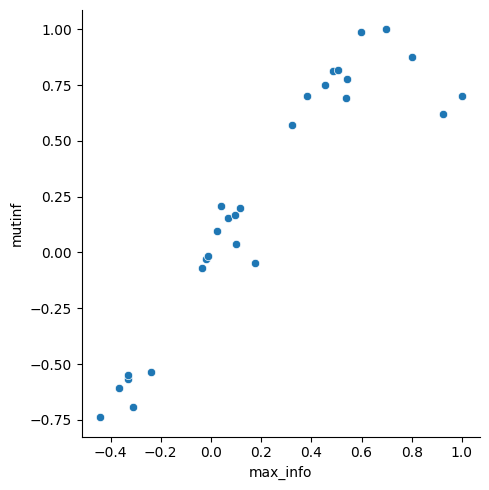

In [22]:
# Checar variables colineales
sns.relplot(data=train_m, x="max_info", y="mutinf")

In [23]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [24]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [25]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

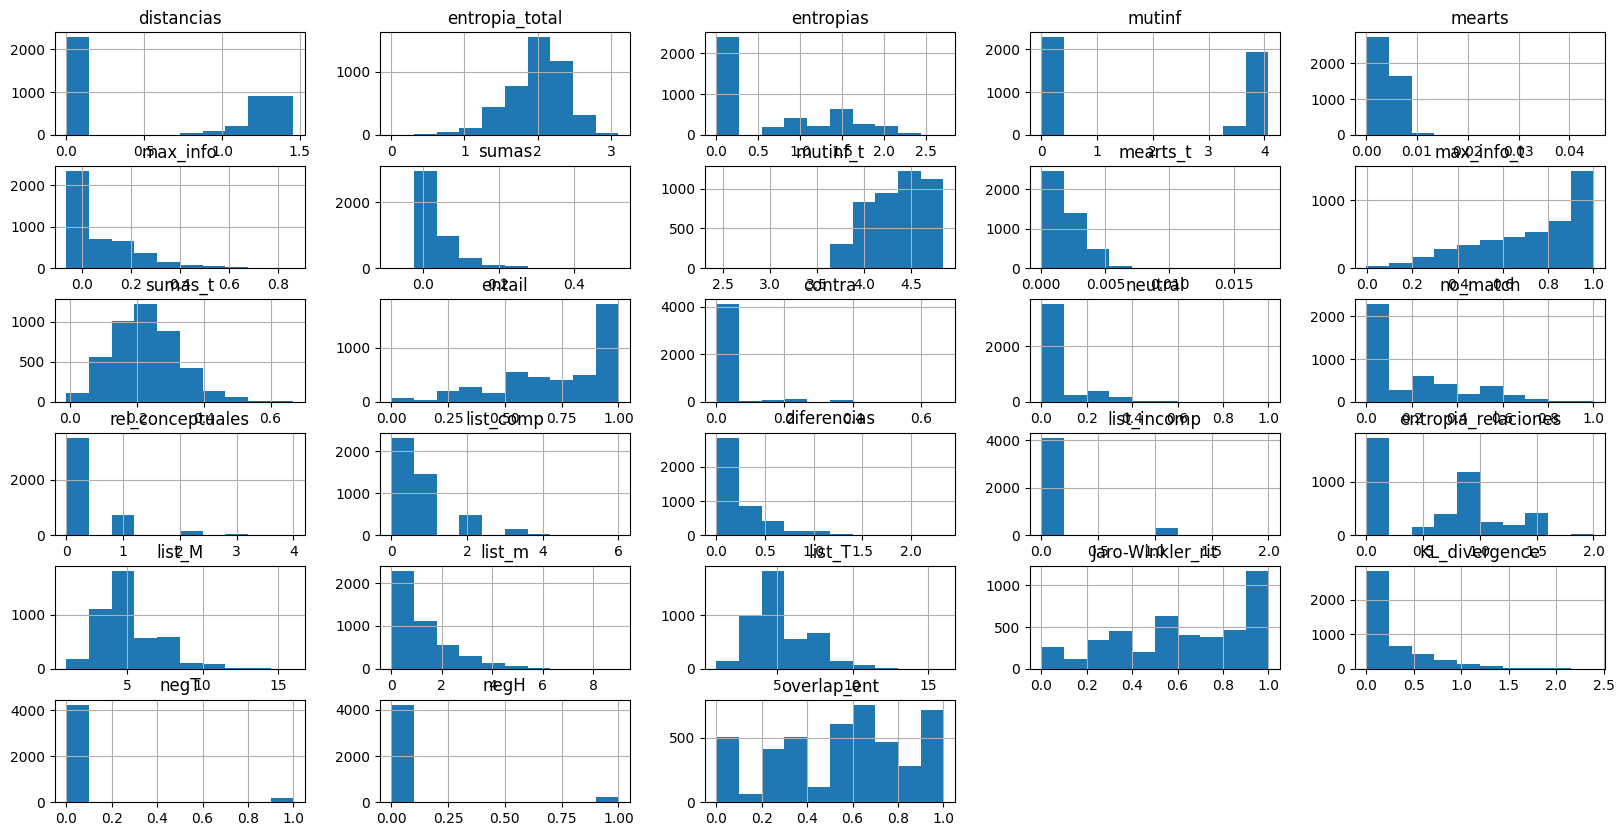

In [26]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [27]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/nuevo4h/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [28]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.269651,2.089354,1.685475,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,...,4,5,0.375000,0.232775,0,,0,,0.000000,CONTRADICTION
1,1.327605,2.017728,1.263809,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,...,2,7,0.571429,0.249111,0,,0,,0.666667,CONTRADICTION
2,1.344318,1.950857,1.094914,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,...,2,7,0.428571,0.412795,0,,0,,0.333333,CONTRADICTION
3,0.000000,1.881168,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,...,0,8,1.000000,0.000000,0,,0,,1.000000,ENTAILMENT
4,1.360140,1.610893,0.985228,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,...,1,7,0.857143,0.277387,0,,0,,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.313888,1.919241,1.295462,3.715960,0.006520,0.136501,0.049228,4.076415,0.003201,0.335569,...,2,5,0.250000,0.350807,0,,0,,0.250000,CONTRADICTION
4902,1.400464,1.578898,0.721928,3.681429,0.005584,0.019384,-0.027277,3.770053,0.004144,0.122140,...,1,5,0.250000,0.439648,0,,0,,0.000000,CONTRADICTION
4903,1.324844,0.747585,0.413817,3.687710,0.006140,0.116333,0.025144,3.697886,0.004207,0.101417,...,3,4,0.000000,0.161270,0,,0,,0.000000,CONTRADICTION
4904,1.307751,1.392618,1.198892,3.814937,0.006552,0.144823,0.081047,3.848196,0.004763,0.146788,...,5,6,0.125000,0.080018,0,,0,,0.000000,CONTRADICTION


In [29]:
test=test.drop(["verbH","verbT"],axis=1)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,1.269651,2.089354,1.685475,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,...,1.000000,8,4,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION
1,1.327605,2.017728,1.263809,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,...,0.863121,7,2,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION
2,1.344318,1.950857,1.094914,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,...,0.863121,7,2,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION
3,0.000000,1.881168,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,...,0.000000,7,0,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT
4,1.360140,1.610893,0.985228,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,...,0.591673,7,1,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.313888,1.919241,1.295462,3.715960,0.006520,0.136501,0.049228,4.076415,0.003201,0.335569,...,1.500000,4,2,5,0.250000,0.350807,0,0,0.250000,CONTRADICTION
4902,1.400464,1.578898,0.721928,3.681429,0.005584,0.019384,-0.027277,3.770053,0.004144,0.122140,...,1.500000,4,1,5,0.250000,0.439648,0,0,0.000000,CONTRADICTION
4903,1.324844,0.747585,0.413817,3.687710,0.006140,0.116333,0.025144,3.697886,0.004207,0.101417,...,1.370951,5,3,4,0.000000,0.161270,0,0,0.000000,CONTRADICTION
4904,1.307751,1.392618,1.198892,3.814937,0.006552,0.144823,0.081047,3.848196,0.004763,0.146788,...,1.298795,8,5,6,0.125000,0.080018,0,0,0.000000,CONTRADICTION


In [30]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,1.269651,2.089354,1.685475,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,...,1.000000,8,4,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION
1,1.327605,2.017728,1.263809,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,...,0.863121,7,2,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION
2,1.344318,1.950857,1.094914,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,...,0.863121,7,2,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION
3,0.000000,1.881168,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,...,0.000000,7,0,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT
4,1.360140,1.610893,0.985228,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,...,0.591673,7,1,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.313888,1.919241,1.295462,3.715960,0.006520,0.136501,0.049228,4.076415,0.003201,0.335569,...,1.500000,4,2,5,0.250000,0.350807,0,0,0.250000,CONTRADICTION
4902,1.400464,1.578898,0.721928,3.681429,0.005584,0.019384,-0.027277,3.770053,0.004144,0.122140,...,1.500000,4,1,5,0.250000,0.439648,0,0,0.000000,CONTRADICTION
4903,1.324844,0.747585,0.413817,3.687710,0.006140,0.116333,0.025144,3.697886,0.004207,0.101417,...,1.370951,5,3,4,0.000000,0.161270,0,0,0.000000,CONTRADICTION
4904,1.307751,1.392618,1.198892,3.814937,0.006552,0.144823,0.081047,3.848196,0.004763,0.146788,...,1.298795,8,5,6,0.125000,0.080018,0,0,0.000000,CONTRADICTION


In [31]:
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,1.269651,2.089354,1.685475,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,...,1.000000,8,4,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION
1,1.327605,2.017728,1.263809,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,...,0.863121,7,2,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION
2,1.344318,1.950857,1.094914,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,...,0.863121,7,2,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION
3,0.000000,1.881168,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,...,0.000000,7,0,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT
4,1.360140,1.610893,0.985228,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,...,0.591673,7,1,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.313888,1.919241,1.295462,3.715960,0.006520,0.136501,0.049228,4.076415,0.003201,0.335569,...,1.500000,4,2,5,0.250000,0.350807,0,0,0.250000,CONTRADICTION
4902,1.400464,1.578898,0.721928,3.681429,0.005584,0.019384,-0.027277,3.770053,0.004144,0.122140,...,1.500000,4,1,5,0.250000,0.439648,0,0,0.000000,CONTRADICTION
4903,1.324844,0.747585,0.413817,3.687710,0.006140,0.116333,0.025144,3.697886,0.004207,0.101417,...,1.370951,5,3,4,0.000000,0.161270,0,0,0.000000,CONTRADICTION
4904,1.307751,1.392618,1.198892,3.814937,0.006552,0.144823,0.081047,3.848196,0.004763,0.146788,...,1.298795,8,5,6,0.125000,0.080018,0,0,0.000000,CONTRADICTION


In [32]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [33]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [34]:
y_test.count(1)

1404

In [35]:
y_test.count(0)

3502

In [36]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [37]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [38]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [39]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [40]:
X_train.shape

(4439, 28)

In [41]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [42]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
model.decision_function(X)

array([ 0.56895978, -1.47505886, -0.61631408, ..., -3.57979945,
       -2.68191844, -5.03118246])

In [44]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [45]:
model.classes_

array([0, 1])

In [46]:
model.coef_[0]

array([-0.55442287,  1.16796572,  0.61046156, -0.46961897,  0.1213344 ,
       -0.33909398, -0.13028991, -1.73770946,  0.97174594,  1.76365462,
        0.32205038,  0.26266259, -0.47207785,  0.58678671, -0.52783944,
        0.05719927,  1.97870859, -0.26744549, -2.59420511, -0.7843737 ,
       -2.83116307, -0.05593496,  1.64476694, -0.3165459 ,  0.2322967 ,
       -4.29479906, -1.98448328,  3.57262381])

In [47]:
coeficientes=model.coef_[0]

In [48]:
coeficientes

array([-0.55442287,  1.16796572,  0.61046156, -0.46961897,  0.1213344 ,
       -0.33909398, -0.13028991, -1.73770946,  0.97174594,  1.76365462,
        0.32205038,  0.26266259, -0.47207785,  0.58678671, -0.52783944,
        0.05719927,  1.97870859, -0.26744549, -2.59420511, -0.7843737 ,
       -2.83116307, -0.05593496,  1.64476694, -0.3165459 ,  0.2322967 ,
       -4.29479906, -1.98448328,  3.57262381])

In [49]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  27 overlap_ent 25 negT


In [50]:
n_columns=train.shape[1]-1

In [51]:
n_columns

28

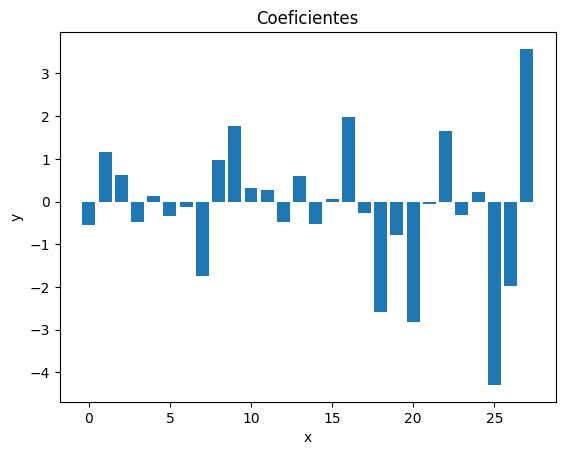

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [53]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [54]:
X_test.shape

(4906, 28)

In [55]:
predictions = model.predict(X_test)

In [56]:
test["predictions"]=predictions
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predictions
0,1.269651,2.089354,1.685475,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,...,8,4,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION,0
1,1.327605,2.017728,1.263809,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,...,7,2,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION,0
2,1.344318,1.950857,1.094914,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,...,7,2,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION,0
3,0.000000,1.881168,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,...,7,0,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT,1
4,1.360140,1.610893,0.985228,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,...,7,1,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.313888,1.919241,1.295462,3.715960,0.006520,0.136501,0.049228,4.076415,0.003201,0.335569,...,4,2,5,0.250000,0.350807,0,0,0.250000,CONTRADICTION,0
4902,1.400464,1.578898,0.721928,3.681429,0.005584,0.019384,-0.027277,3.770053,0.004144,0.122140,...,4,1,5,0.250000,0.439648,0,0,0.000000,CONTRADICTION,0
4903,1.324844,0.747585,0.413817,3.687710,0.006140,0.116333,0.025144,3.697886,0.004207,0.101417,...,5,3,4,0.000000,0.161270,0,0,0.000000,CONTRADICTION,0
4904,1.307751,1.392618,1.198892,3.814937,0.006552,0.144823,0.081047,3.848196,0.004763,0.146788,...,8,5,6,0.125000,0.080018,0,0,0.000000,CONTRADICTION,0


In [57]:
test[(test["clases"]=="ENTAILMENT") & (test["predictions"]==0)]

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predictions
17,0.000000,2.796614,0.000000,0.000000,0.000000,0.000000,0.000000,4.682331,0.000000,1.000000,...,6,0,7,0.500000,0.000000,0,0,0.400000,ENTAILMENT,0
18,0.000000,2.500941,0.000000,0.000000,0.000000,0.000000,0.000000,4.517777,0.000662,0.930899,...,6,0,7,0.833333,0.000000,0,0,0.666667,ENTAILMENT,0
24,0.999999,1.889026,0.970951,3.885459,0.004431,0.087943,0.043841,4.522133,0.000656,0.817589,...,5,1,5,0.800000,0.659721,0,0,1.000000,ENTAILMENT,0
39,1.306036,1.943340,1.000000,3.785758,0.006490,0.147189,0.045850,4.539265,0.000621,0.893399,...,8,1,8,0.875000,0.477803,0,0,0.400000,ENTAILMENT,0
56,0.000000,1.961406,0.000000,0.000000,0.000000,0.000000,0.000000,4.284227,0.002078,0.681128,...,6,0,5,0.833333,0.000000,0,0,0.500000,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,1.029320,2.480203,2.128085,3.737296,0.004204,0.470228,0.166244,4.240598,0.001699,0.706449,...,8,1,7,0.750000,1.482370,0,0,0.600000,ENTAILMENT,0
4763,0.000000,1.224394,0.000000,0.000000,0.000000,0.000000,0.000000,4.463848,0.001533,0.845575,...,3,0,3,1.000000,0.000000,0,0,0.500000,ENTAILMENT,0
4769,0.000000,2.530639,0.000000,0.000000,0.000000,0.000000,0.000000,4.569281,0.001077,0.829745,...,4,0,4,1.000000,0.000000,0,0,0.666667,ENTAILMENT,0
4772,0.000000,2.356475,0.000000,0.000000,0.000000,0.000000,0.000000,4.144079,0.003205,0.580522,...,4,0,9,0.750000,0.000000,0,0,0.333333,ENTAILMENT,0


In [58]:
#test.to_csv("predictions_SICK_DEV.csv")

In [59]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[1009  395]
 [ 471 3031]]


In [60]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.68
recall 0.72
f1_score:  0.7
matthews_score:  0.58


In [ ]:
# [[1010  394]
#  [ 480 3022]]
# acccuracy:  0.82
# precision:  0.68
# recall 0.72
# f1_score:  0.7
# matthews_score:  0.57

In [61]:
X_train.shape

(4439, 28)

In [62]:
X_test.shape

(4906, 28)

In [63]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [64]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [65]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.820000 (0.012824)
Logistic Regression Precision:: 0.820000 (0.015131)
Logistic Regression Recall:: 0.820000 (0.012824)
Logistic Regression F1-score:: 0.820000 (0.013926)


In [66]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.680000 (0.051069)
Logistic Regression Recall:: 0.660000 (0.062491)
Logistic Regression F1-score:: 0.670000 (0.049570)


In [67]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.770000 (0.021328)
Logistic Regression Recall:: 0.770000 (0.025958)
Logistic Regression F1-score:: 0.770000 (0.022671)


In [68]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.820000 (0.012824)
Logistic Regression Recall:: 0.820000 (0.012824)
Logistic Regression F1-score:: 0.820000 (0.012824)


In [69]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.540000 (0.045377)


In [61]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [125]:
#linear_model

In [126]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [62]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3502
           1       0.68      0.72      0.70      1404

    accuracy                           0.82      4906
   macro avg       0.78      0.79      0.79      4906
weighted avg       0.83      0.82      0.82      4906



In [ ]:
#  precision    recall  f1-score   support

#            0       0.88      0.86      0.87      3502
#            1       0.68      0.72      0.70      1404

#     accuracy                           0.82      4906
#    macro avg       0.78      0.79      0.79      4906
# weighted avg       0.83      0.82      0.82      4906

#  precision    recall  f1-score   support

#            0       0.86      0.88      0.87      3502
#            1       0.68      0.64      0.66      1404

#     accuracy                           0.81      4906
#    macro avg       0.77      0.76      0.76      4906
# weighted avg       0.81      0.81      0.81      4906

In [63]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [64]:
test.columns[:-2]

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'rel_conceptuales',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [65]:
explainer.expected_value

-1.485409879345997

In [66]:
X_test

array([[0.87330036, 0.68306189, 0.62266103, ..., 0.        , 0.        ,
        0.        ],
       [0.91316265, 0.65964568, 0.46688595, ..., 0.        , 0.        ,
        0.66666667],
       [0.9246584 , 0.63778378, 0.40449153, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.91126353, 0.24440408, 0.15287535, ..., 0.        , 0.        ,
        0.        ],
       [0.89950622, 0.45528147, 0.44290388, ..., 0.        , 0.        ,
        0.        ],
       [0.89284748, 0.52617594, 0.56541426, ..., 0.        , 0.        ,
        0.        ]])

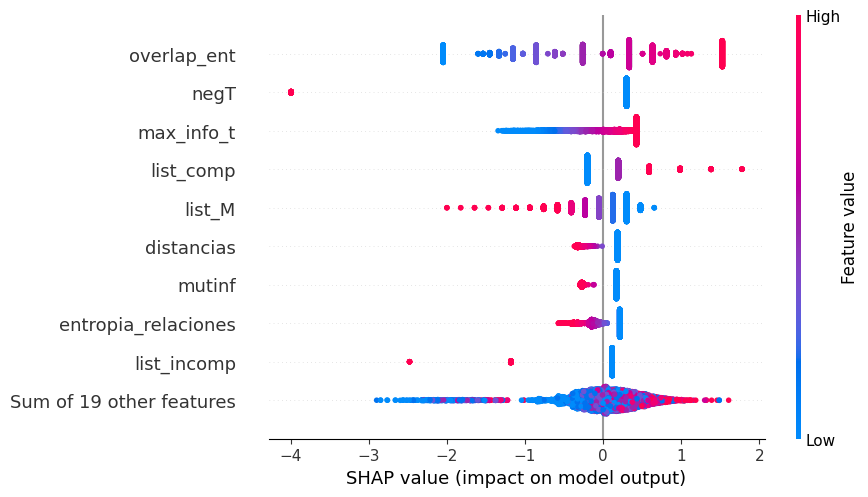

In [67]:
shap.plots.beeswarm(shap_values)

[0.         0.87556685 0.         0.         0.         0.
 0.         0.8375496  0.21256247 0.58725685 0.305726   0.66666667
 0.         0.33333333 0.         0.5        0.4        0.
 0.         0.45914792 0.375      0.         0.4        0.66666667
 0.         0.         0.         0.25      ] 0 0


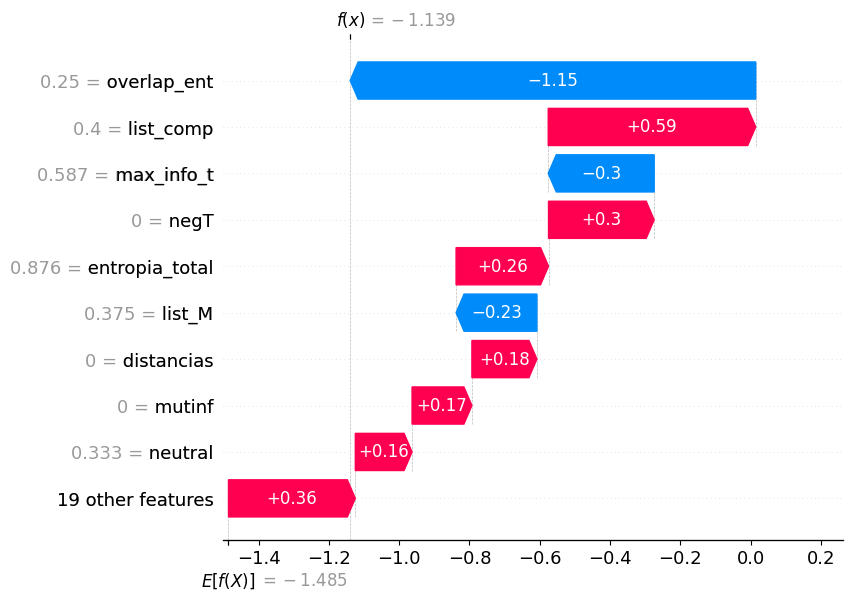

In [68]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [69]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.91739828 0.53761146 0.46688595 0.95367512 0.16914902 0.12700167
 0.08835622 0.85470472 0.22051327 0.4067985  0.15215869 0.33333333
 0.         0.         0.66666667 0.         0.         0.08163265
 0.         0.45914792 0.1875     0.2        0.46666667 0.33333333
 0.06419812 0.         0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

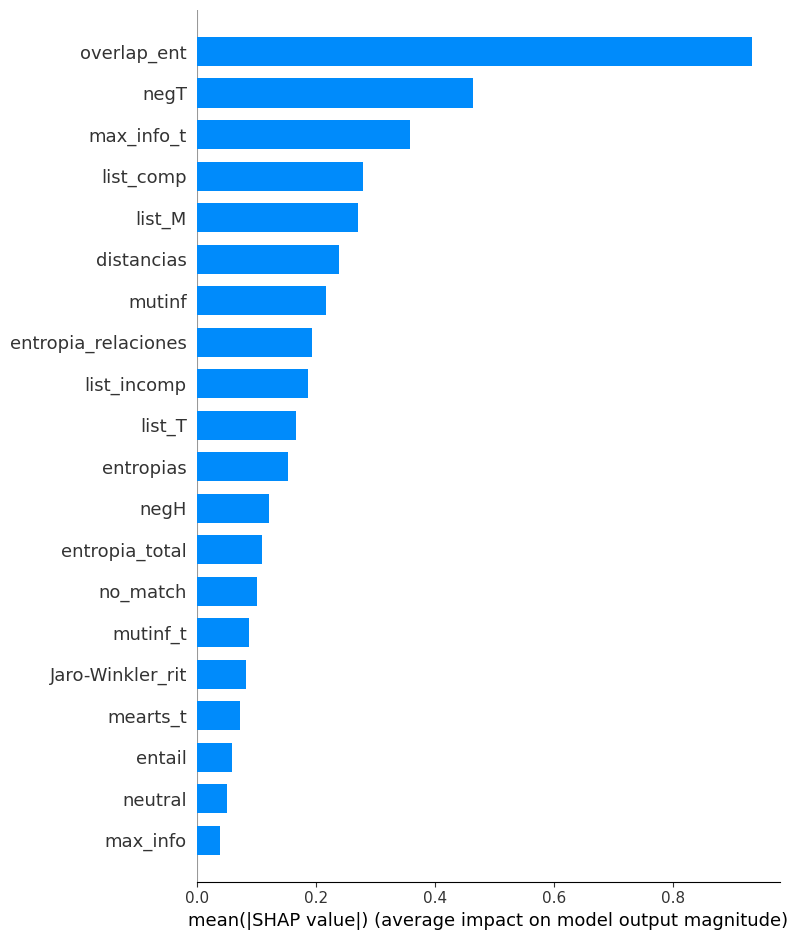

In [70]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

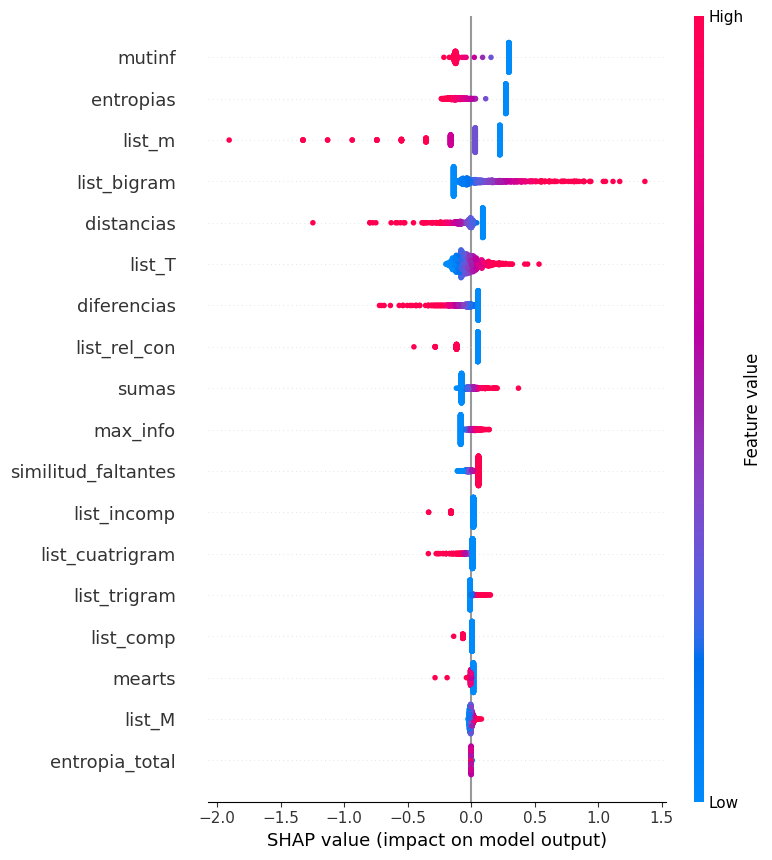

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

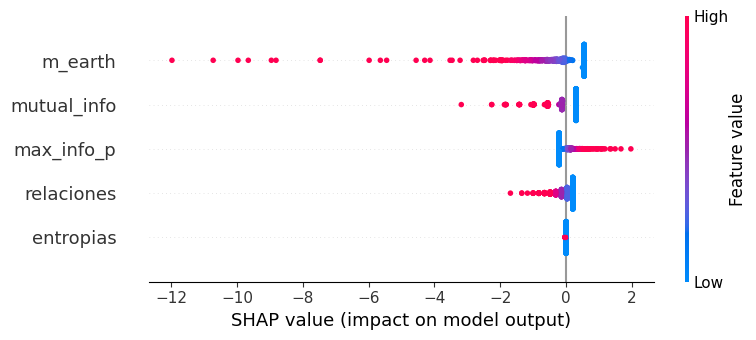

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

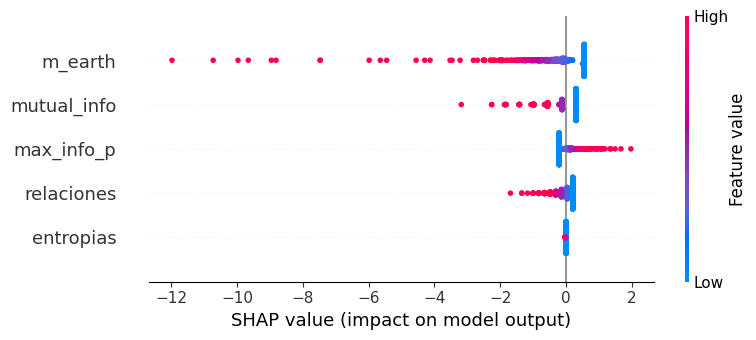

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [85]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.78
precision:  0.61
recall 0.69
f1_score:  0.65
matthews_score:  0.49


In [86]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [87]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.670000 (0.048836)
DecisionTree: 0.660000 (0.035226)
DecisionTree: 0.670000 (0.033797)


In [88]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[2874,  628],
       [ 434,  970]])

Profundidad del árbol: 29
Número de nodos terminales: 1014


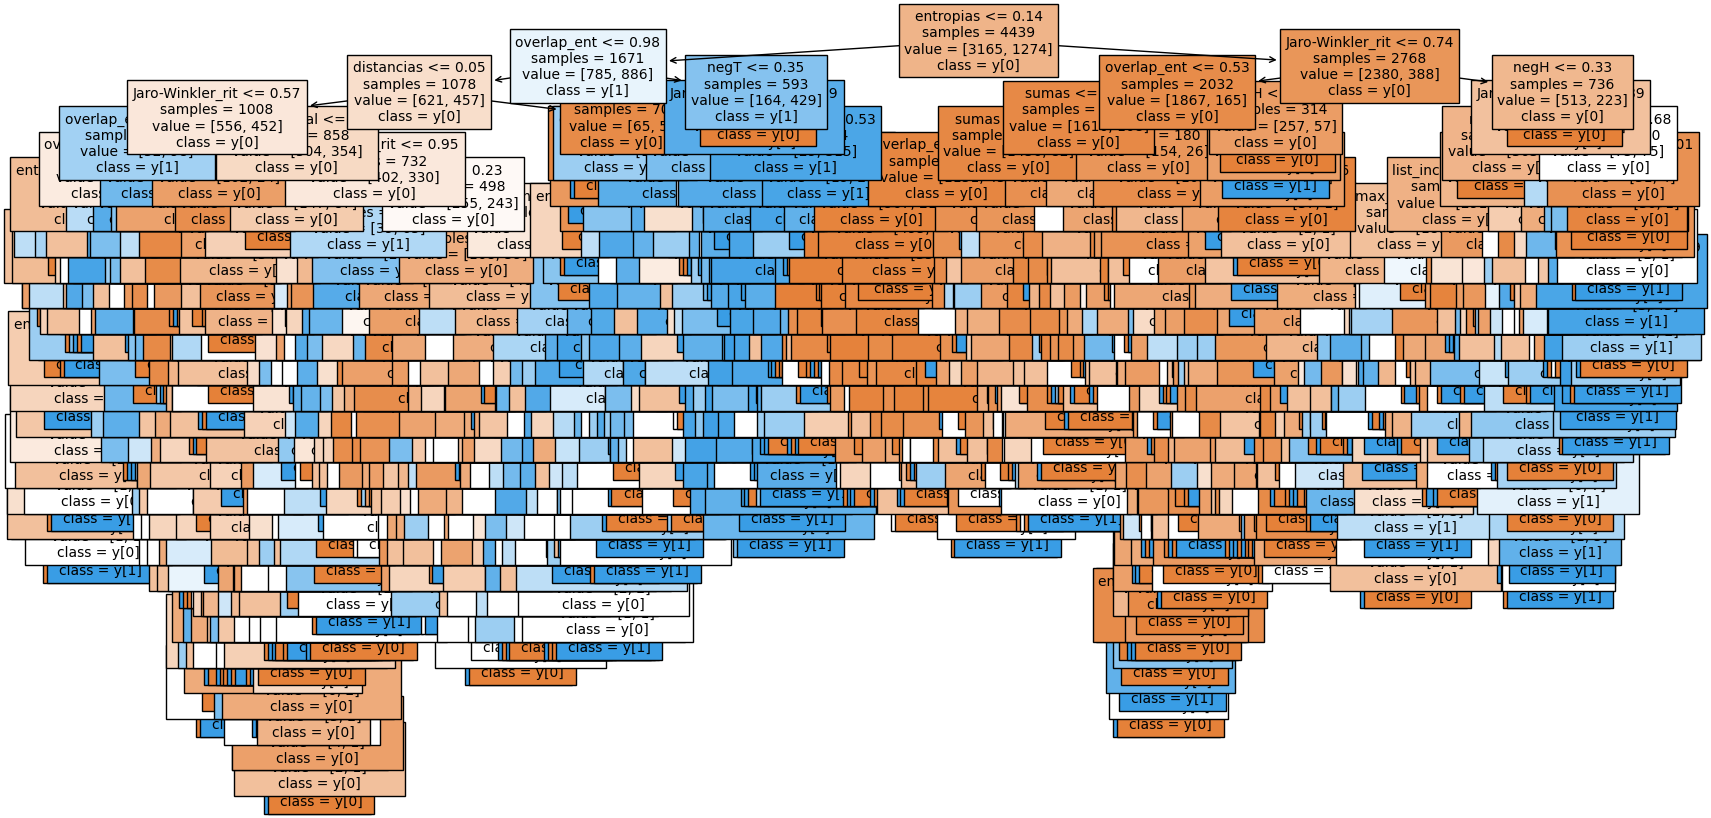

In [89]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )